This work is based on the Unit1-Obspy presentation from [Sydney Dybing](https://www.iris.edu/hq/inclass/lesson/704)

In [50]:
#Downloading data from online IRIS DMC repository:
from obspy.clients.fdsn import Client
client = Client("IRIS")

We need to set the times the way Obspy does:

In [51]:
from obspy import UTCDateTime

For this work we will work with a seismo [magnitud 5 at Northern Chile](https://earthquake.usgs.gov/earthquakes/eventpage/us7000f3fn/executive)

From the Origin box at this location we cut the origin time for this event

In [52]:
time = UTCDateTime("2021-08-25T00:28:32.582")
print(time)

2021-08-25T00:28:32.582000Z


We are interested in download one minute before this event and 2 minutes after this event.

In [53]:
starttime = time - 2
endtime = time + 2*60

Now we need to find the instrument that sense this event. In this case we choose some stations that are close to the origin of this event.To identify these stations we use the [IRIS Metadata Aggregator](http://ds.iris.edu/mda/)
From the global network the following network(stations) are used:

C1(AC01,AC02,AC04,AC05,AC06), C(GO03), IU(LCO)



In [54]:
net1 = "C1"
sta1 = "AC01"
loc1 = "--"
chan1 = "BHE"

To download the data we use the get_waveforms from obspy

1 Trace(s) in Stream:
C1.AC01..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


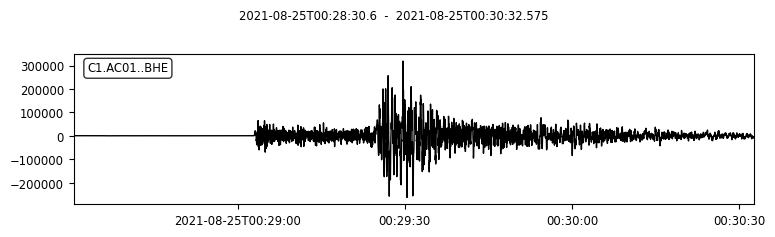

In [55]:
st1_1 = client.get_waveforms(net1,sta1,loc1,chan1,starttime,endtime)
print(st1_1)
st1_1.plot();

We can download all three channels using * wildcard

1 Trace(s) in Stream:
C1.AC01..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


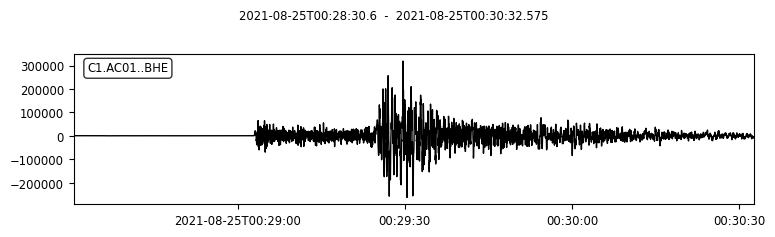

In [56]:
st1_1 = client.get_waveforms(net1,sta1,loc1,chan1,starttime,endtime)
print(st1_1)
st1_1.plot();

We can see the ground movement of this event by making what is call "Removing instrument response"
To do this we need to add the argument "attach_response = True" to the data query. After that we can request the plot showing the ground motion as (m/s) for example.

In [57]:
st_C1AC01 = client.get_waveforms(net1,sta1,loc1,"BH*",starttime,endtime,attach_response = True)
print(st_C1AC01)

3 Trace(s) in Stream:
C1.AC01..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC01..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC01..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C1.AC01..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC01..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC01..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


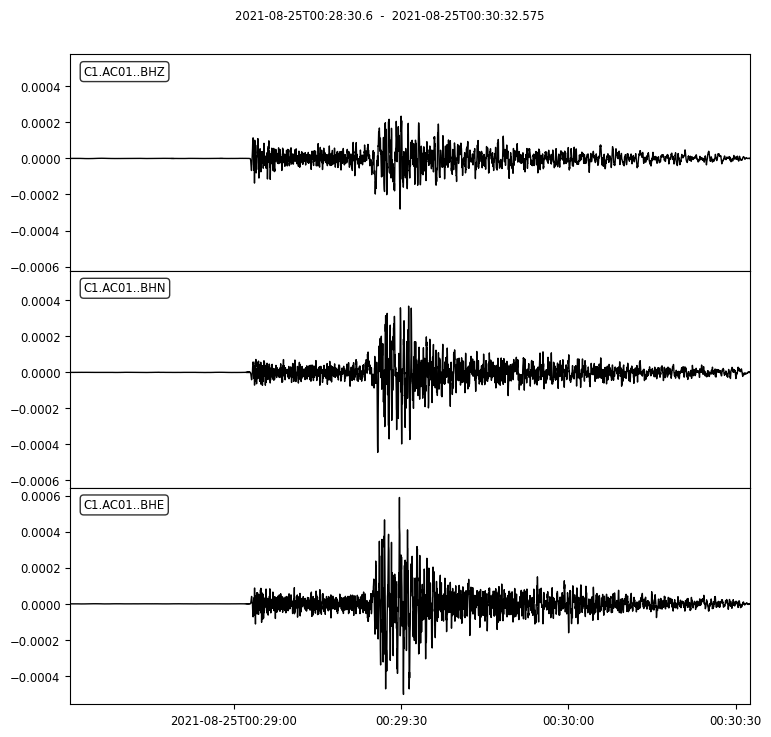

In [58]:
st_C1AC01.remove_response(output="VEL")
print(st_C1AC01)
st_C1AC01.plot();

##Wrinting downloaded data to a file

In [59]:
st_C1AC01.write("st_C1AC01.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [60]:
### from obspy import read
#st_C1AC01 = read("st_C1AC01.mseed")
#print(st_C1AC01)
#st_C1AC01.plot();

Filtering Seismogram

In [61]:
#st_C1AC01_filt = st_C1AC01.copy()
#st_C1AC01_filt.filter("bandpass", freqmin=1.0, freqmax=10.0)

#st_C1AC01.plot()
#st_C1AC01_filt.plot();

In [62]:
net1 = "C1"
sta2 = "AC02"
loc2 = "--"
chan2 = "BH*"

In [63]:
st_C1AC02 = client.get_waveforms(net1,sta2,loc2,chan2,starttime,endtime,attach_response = True)
print(st_C1AC02)

3 Trace(s) in Stream:
C1.AC02..BHE | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples
C1.AC02..BHN | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples
C1.AC02..BHZ | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C1.AC02..BHE | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples
C1.AC02..BHN | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples
C1.AC02..BHZ | 2021-08-25T00:28:30.599998Z - 2021-08-25T00:30:32.574998Z | 40.0 Hz, 4880 samples


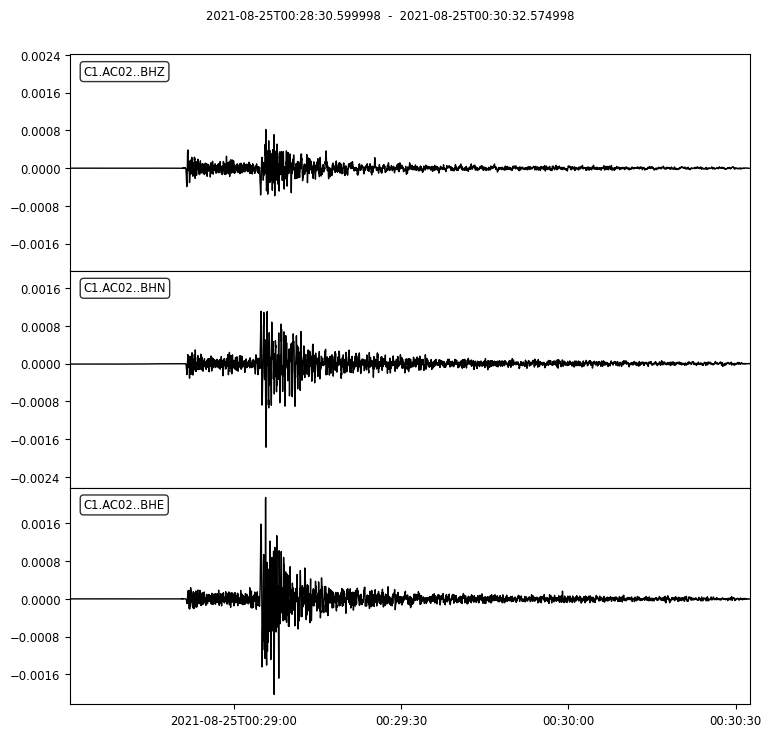

In [64]:
st_C1AC02.remove_response(output="VEL")
print(st_C1AC02)
st_C1AC02.plot();

In [65]:
st_C1AC02.write("st_C1AC02.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [66]:
net1 = "C1"
sta3 = "AC04"
loc3 = "--"
chan3 = "BH*"

In [67]:
st_C1AC04 = client.get_waveforms(net1,sta3,loc3,chan3,starttime,endtime,attach_response = True)
print(st_C1AC04)

3 Trace(s) in Stream:
C1.AC04..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC04..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC04..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C1.AC04..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC04..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC04..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


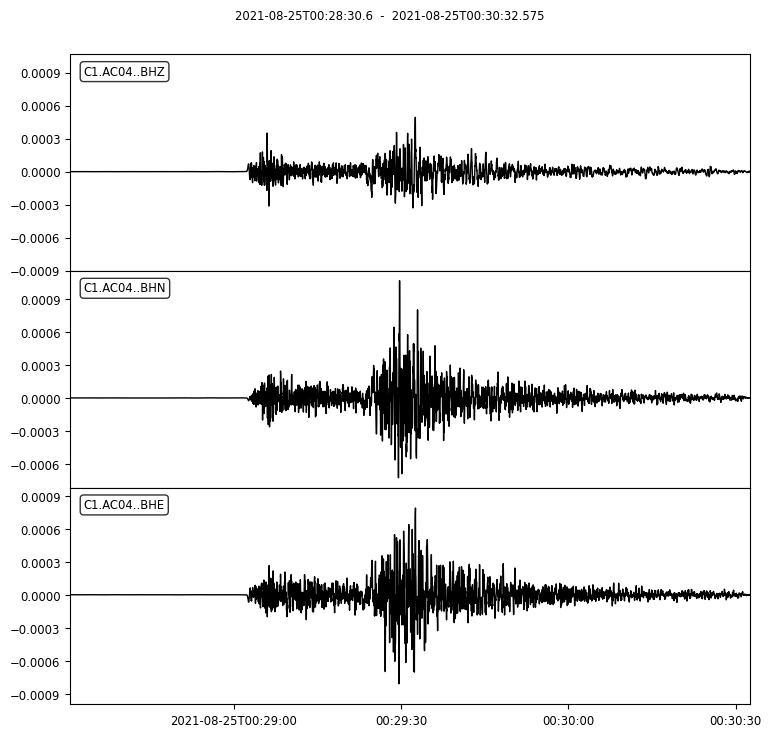

In [68]:
st_C1AC04.remove_response(output="VEL")
print(st_C1AC04)
st_C1AC04.plot();

In [69]:
st_C1AC04.write("st_C1AC04.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [70]:
net1 = "C1"
sta4 = "AC05"
loc4 = "--"
chan4 = "BH*"

In [71]:
st_C1AC05 = client.get_waveforms(net1,sta4,loc4,chan4,starttime,endtime,attach_response = True)
print(st_C1AC05)

3 Trace(s) in Stream:
C1.AC05..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC05..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC05..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C1.AC05..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC05..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC05..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


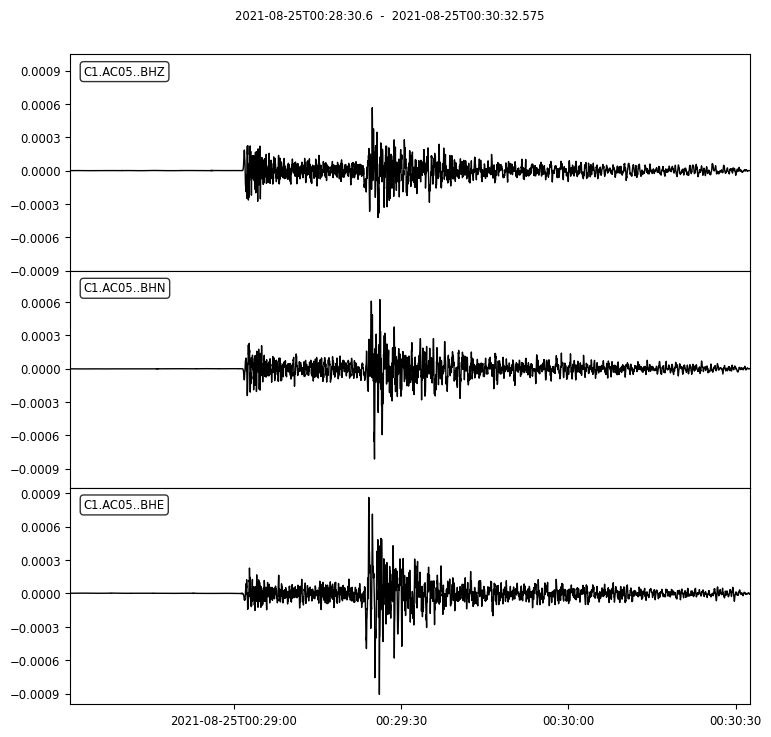

In [72]:
st_C1AC05.remove_response(output="VEL")
print(st_C1AC05)
st_C1AC05.plot();

In [73]:
st_C1AC05.write("st_C1AC05.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [74]:
net1 = "C1"
sta5 = "AC06"
loc5 = "--"
chan5 = "BH*"

In [75]:
st_C1AC06 = client.get_waveforms(net1,sta5,loc5,chan5,starttime,endtime,attach_response = True)
print(st_C1AC06)

3 Trace(s) in Stream:
C1.AC06..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC06..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC06..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C1.AC06..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC06..BHN | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C1.AC06..BHZ | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples


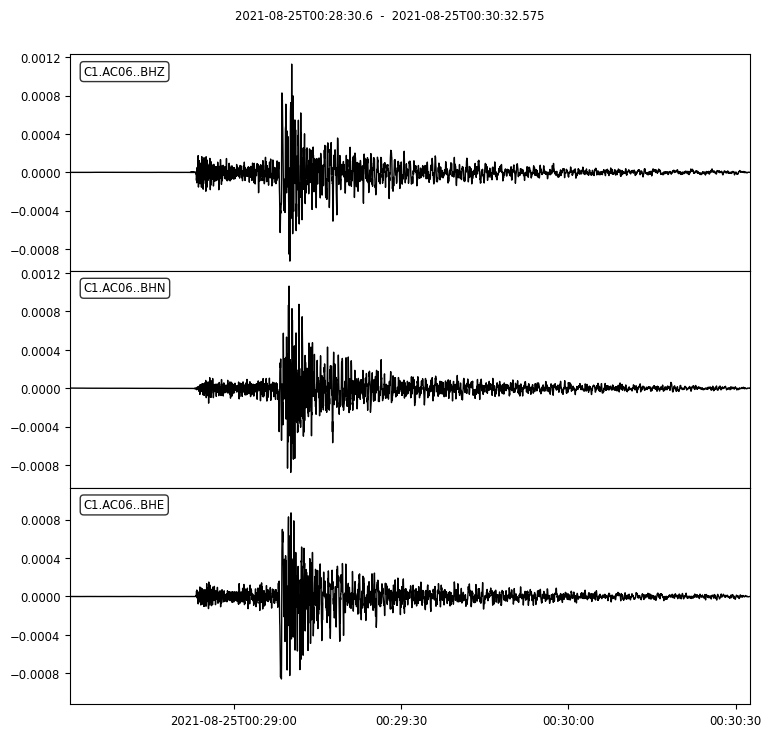

In [76]:
st_C1AC06.remove_response(output="VEL")
print(st_C1AC06)
st_C1AC06.plot();

In [77]:
st_C1AC06.write("st_C1AC06.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [78]:
net2 = "C"
sta6 = "GO03"
loc6 = "--"
chan6 = "BH*"

In [79]:
st_CGO03 = client.get_waveforms(net2,sta6,loc6,chan6,starttime,endtime,attach_response = True)
print(st_CGO03)

3 Trace(s) in Stream:
C.GO03..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C.GO03..BHN | 2021-08-25T00:28:30.600001Z - 2021-08-25T00:30:32.575001Z | 40.0 Hz, 4880 samples
C.GO03..BHZ | 2021-08-25T00:28:30.600001Z - 2021-08-25T00:30:32.575001Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
C.GO03..BHE | 2021-08-25T00:28:30.600000Z - 2021-08-25T00:30:32.575000Z | 40.0 Hz, 4880 samples
C.GO03..BHN | 2021-08-25T00:28:30.600001Z - 2021-08-25T00:30:32.575001Z | 40.0 Hz, 4880 samples
C.GO03..BHZ | 2021-08-25T00:28:30.600001Z - 2021-08-25T00:30:32.575001Z | 40.0 Hz, 4880 samples


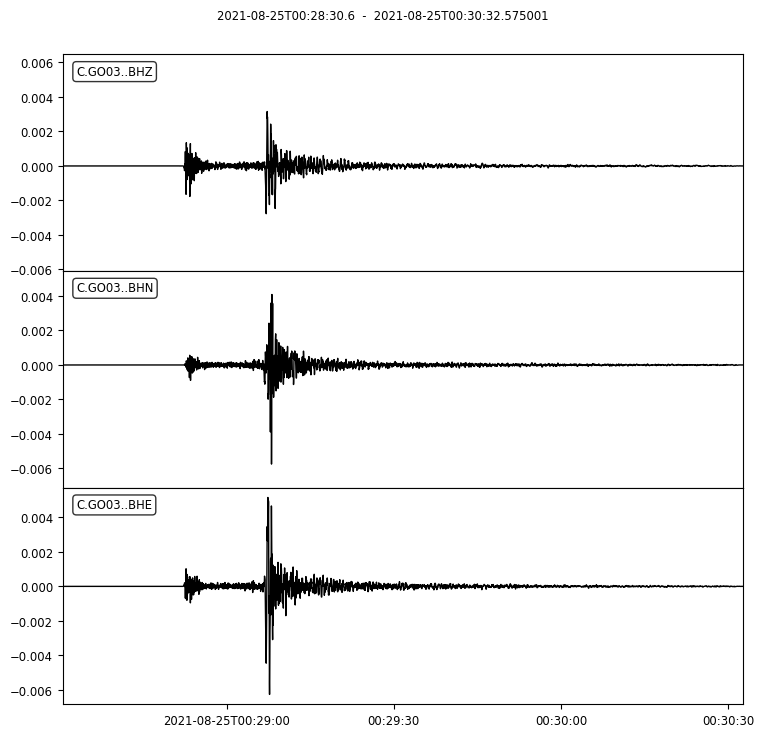

In [80]:
st_CGO03.remove_response(output="VEL")
print(st_CGO03)
st_CGO03.plot();

In [81]:
st_CGO03.write("st_CGO03.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [82]:
net3 = "IU"
sta7 = "LCO"
loc7 = "10"
chan7 = "BH*"

In [83]:
st_IULCO = client.get_waveforms(net3,sta7,loc7,chan7,starttime,endtime,attach_response = True)
print(st_IULCO)

3 Trace(s) in Stream:
IU.LCO.10.BH1 | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples
IU.LCO.10.BH2 | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples
IU.LCO.10.BHZ | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples


3 Trace(s) in Stream:
IU.LCO.10.BH1 | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples
IU.LCO.10.BH2 | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples
IU.LCO.10.BHZ | 2021-08-25T00:28:30.594538Z - 2021-08-25T00:30:32.569538Z | 40.0 Hz, 4880 samples


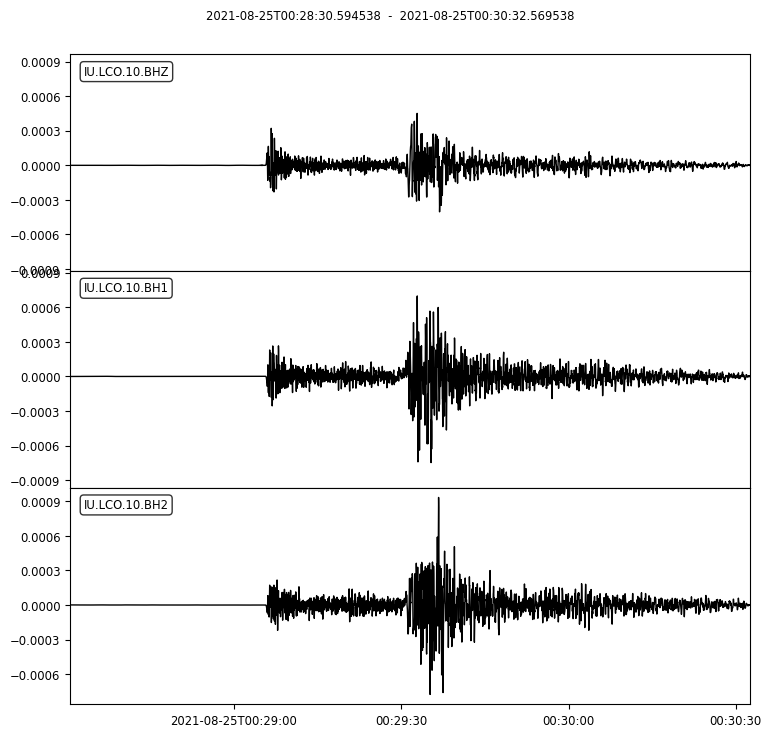

In [84]:
st_IULCO.remove_response(output="VEL")
print(st_IULCO)
st_IULCO.plot();

In [85]:
st_IULCO.write("st_IULCO.mseed",format="MSEED")

/home/hugo/anaconda3/envs/obspy/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
